In [1]:
# Mount google drive (run this cell and allow permissions)
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
import sys    
path_to_module = '/content/gdrive/MyDrive/CPSC554X'
sys.path.append(path_to_module)

In [3]:
# !git clone https://github.com/ejconlon/biosignals.git '/content/gdrive/MyDrive/CPSC554X/biosignals'

In [4]:
! pip install -U pynwb
! pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 126 kB 38.5 MB/s 
     |████████████████████████████████| 187 kB 72.7 MB/s 
     |████████████████████████████████| 109 kB 76.2 MB/s 
     |████████████████████████████████| 555 kB 67.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.7 MB 9.6 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


In [5]:
# Boilerplate to chdir to project root and add projects sources to python path
import os
import sys

import keras
keras.utils.set_random_seed(42)

os.chdir('/content/gdrive/MyDrive/CPSC554X/biosignals')
sys.path.append(os.path.abspath('.'))

# Prepare the dataset
import biosignals.prepare as bp
if not bp.has_prepared('rand'):
    bp.prepare_rand()

import biosignals.deep_models as bdeep

Training model lstm-feature jit
Epoch 1/40
25/25 [==============================] - 18s 379ms/step - loss: 0.7269 - accuracy: 0.5276
Epoch 2/40
25/25 [==============================] - 10s 384ms/step - loss: 0.6586 - accuracy: 0.5963
Epoch 3/40
25/25 [==============================] - 10s 394ms/step - loss: 0.6373 - accuracy: 0.6302
Epoch 4/40
25/25 [==============================] - 10s 393ms/step - loss: 0.6156 - accuracy: 0.6543
Epoch 5/40
25/25 [==============================] - 10s 403ms/step - loss: 0.5929 - accuracy: 0.6838
Epoch 6/40
25/25 [==============================] - 10s 403ms/step - loss: 0.5773 - accuracy: 0.6960
Epoch 7/40
25/25 [==============================] - 10s 404ms/step - loss: 0.5596 - accuracy: 0.7045
Epoch 8/40
25/25 [==============================] - 10s 402ms/step - loss: 0.5472 - accuracy: 0.7265
Epoch 9/40
25/25 [==============================] - 10s 400ms/step - loss: 0.5358 - accuracy: 0.7393
Epoch 10/40
25/25 [==============================] - 10s 40

lstm-feature_jit train size: 3188
lstm-feature_jit train tn: 1241
lstm-feature_jit train fp: 353
lstm-feature_jit train fn: 270
lstm-feature_jit train tp: 1324
lstm-feature_jit train accuracy: 0.8045796737766625
lstm-feature_jit train precision: 0.789505068574836
lstm-feature_jit train recall: 0.8306148055207027
lstm-feature_jit train f1: 0.8095383674717213
13/13 [==============================] - 1s 60ms/step
lstm-feature_jit test size: 394
lstm-feature_jit test tn: 132
lstm-feature_jit test fp: 65
lstm-feature_jit test fn: 70
lstm-feature_jit test tp: 127
lstm-feature_jit test accuracy: 0.6573604060913706
lstm-feature_jit test precision: 0.6614583333333334
lstm-feature_jit test recall: 0.6446700507614214
lstm-feature_jit test f1: 0.6529562982005142


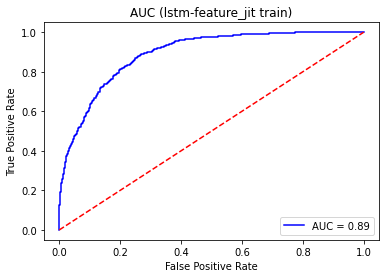

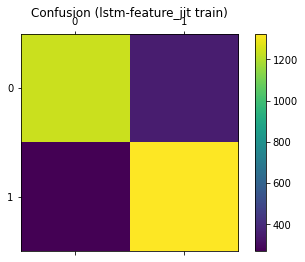

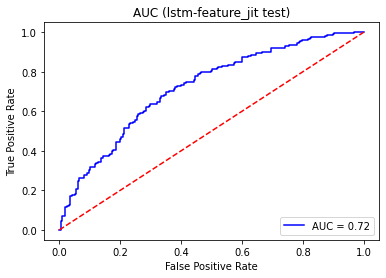

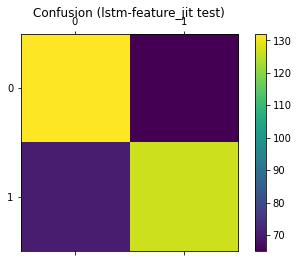

In [ ]:
import biosignals.models as bm
from typing import Optional, List
from numpy.random import RandomState

def mk_lstm_feature_model():
    return bdeep.SequentialModel(bdeep.LSTMFeatureModel, {}, bdeep.FEAT_CONFIG, SEQ_CONFIG)
    
SEQ_CONFIG = bdeep.SequentialConfig(num_epochs=40, batch_size=128, verbose=True)

MODELS = []


# NOTE: When ready to test with holdouts, change list to bp.STANDARD_PREP_NAMES
for prep_name in ['jit']:
    MODELS.extend([
        bm.ModelCase('lstm-feature', prep_name, mk_lstm_feature_model),
    ])

# Test training with some deep learning models
def test_models(models: Optional[List[bm.ModelCase]] = None):
    if models is None:
        models = bdeep.MODELS
    bp.ensure_all()
    for case in models:
        print(f'Training model {case.model_name} {case.prep_name}')
        rand = RandomState(42)
        model = case.model_fn()
        model.execute(case.model_name, case.prep_name, rand)

test_models(MODELS)

Training model gru-feature jit
Epoch 1/50
25/25 [==============================] - 11s 311ms/step - loss: 0.7315 - accuracy: 0.5125
Epoch 2/50
25/25 [==============================] - 8s 319ms/step - loss: 0.6583 - accuracy: 0.5991
Epoch 3/50
25/25 [==============================] - 8s 317ms/step - loss: 0.6402 - accuracy: 0.6493
Epoch 4/50
25/25 [==============================] - 8s 320ms/step - loss: 0.6199 - accuracy: 0.6518
Epoch 5/50
25/25 [==============================] - 8s 317ms/step - loss: 0.6024 - accuracy: 0.6788
Epoch 6/50
25/25 [==============================] - 8s 318ms/step - loss: 0.5845 - accuracy: 0.6951
Epoch 7/50
25/25 [==============================] - 8s 318ms/step - loss: 0.5729 - accuracy: 0.7017
Epoch 8/50
25/25 [==============================] - 8s 315ms/step - loss: 0.5614 - accuracy: 0.7105
Epoch 9/50
25/25 [==============================] - 8s 316ms/step - loss: 0.5426 - accuracy: 0.7309
Epoch 10/50
25/25 [==============================] - 8s 317ms/step -

gru-feature_jit train size: 3188
gru-feature_jit train tn: 1500
gru-feature_jit train fp: 94
gru-feature_jit train fn: 24
gru-feature_jit train tp: 1570
gru-feature_jit train accuracy: 0.9629861982434128
gru-feature_jit train precision: 0.9435096153846154
gru-feature_jit train recall: 0.9849435382685069
gru-feature_jit train f1: 0.9637814610190301
13/13 [==============================] - 1s 56ms/step
gru-feature_jit test size: 394
gru-feature_jit test tn: 139
gru-feature_jit test fp: 58
gru-feature_jit test fn: 58
gru-feature_jit test tp: 139
gru-feature_jit test accuracy: 0.7055837563451777
gru-feature_jit test precision: 0.7055837563451777
gru-feature_jit test recall: 0.7055837563451777
gru-feature_jit test f1: 0.7055837563451777


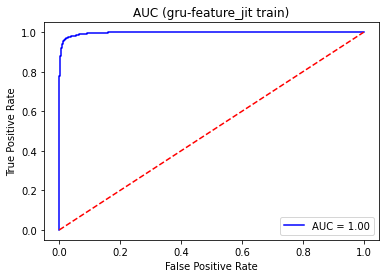

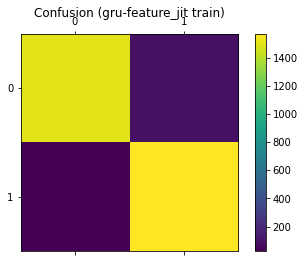

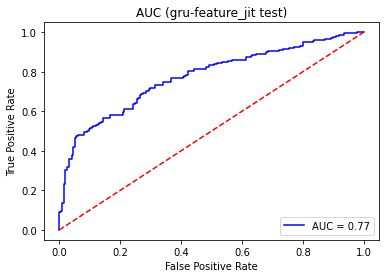

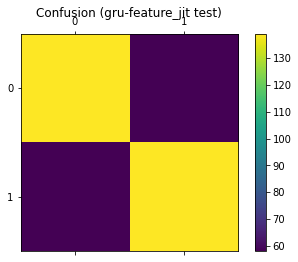

In [ ]:
import tensorflow as tf
from keras.layers import Dense, LSTM, GRU, Activation, Conv1D, Flatten, Input  # Dropout, BatchNormalization
class GRUFeatureModel(tf.keras.Model):
    def __init__(self):
        super(GRUFeatureModel, self).__init__()
        self.gru1 = GRU(512, input_shape=(750, 32), return_sequences=True)
        self.activation = Activation("relu")
        self.gru2 = GRU(256)
        self.dense1 = Dense(128, activation='relu')
        self.dense2 = Dense(128, activation='relu')
        self.dense3 = Dense(1, activation='sigmoid')

    def call(self, inputs):
        [x, w] = inputs
        out1 = self.gru1(w)
        out1 = self.activation(out1)
        out1 = self.gru2(out1)
        out1 = self.dense1(out1)
        out2 = self.dense2(x)
        out = tf.keras.layers.Add()([out1, out2])
        return self.dense3(out)

def mk_gru_feature_model():
    return bdeep.SequentialModel(GRUFeatureModel, {}, FEAT_CONFIG, SEQ_CONFIG)

SEQ_CONFIG = bdeep.SequentialConfig(num_epochs=50, batch_size=128, verbose=True)
FEAT_CONFIG = bm.FeatureConfig(strategy=bm.Strategy.MULTI, use_pca=True, use_eeg=True)

MODELS = []


# NOTE: When ready to test with holdouts, change list to bp.STANDARD_PREP_NAMES
for prep_name in ['jit']:
    MODELS.extend([
        bm.ModelCase('gru-feature', prep_name, mk_gru_feature_model),
    ])

# Test training with some deep learning models
def test_models(models: Optional[List[bm.ModelCase]] = None):
    if models is None:
        models = bdeep.MODELS
    bp.ensure_all()
    for case in models:
        print(f'Training model {case.model_name} {case.prep_name}')
        rand = RandomState(42)
        model = case.model_fn()
        model.execute(case.model_name, case.prep_name, rand)

test_models(MODELS)        

Training model gru-feature jit
Epoch 1/50
13/13 [==============================] - 10s 512ms/step - loss: 0.7398 - accuracy: 0.5094
Epoch 2/50
13/13 [==============================] - 7s 513ms/step - loss: 0.6705 - accuracy: 0.5831
Epoch 3/50
13/13 [==============================] - 7s 528ms/step - loss: 0.6580 - accuracy: 0.6170
Epoch 4/50
13/13 [==============================] - 7s 522ms/step - loss: 0.6345 - accuracy: 0.6581
Epoch 5/50
13/13 [==============================] - 7s 523ms/step - loss: 0.6193 - accuracy: 0.6788
Epoch 6/50
13/13 [==============================] - 7s 535ms/step - loss: 0.6021 - accuracy: 0.6992
Epoch 7/50
13/13 [==============================] - 7s 541ms/step - loss: 0.5804 - accuracy: 0.7111
Epoch 8/50
13/13 [==============================] - 7s 556ms/step - loss: 0.5668 - accuracy: 0.7164
Epoch 9/50
13/13 [==============================] - 7s 562ms/step - loss: 0.5516 - accuracy: 0.7280
Epoch 10/50
13/13 [==============================] - 7s 558ms/step -

gru-feature_jit train size: 3188
gru-feature_jit train tn: 1533
gru-feature_jit train fp: 61
gru-feature_jit train fn: 5
gru-feature_jit train tp: 1589
gru-feature_jit train accuracy: 0.979297365119197
gru-feature_jit train precision: 0.963030303030303
gru-feature_jit train recall: 0.9968632371392723
gru-feature_jit train f1: 0.9796547472256474
13/13 [==============================] - 1s 55ms/step
gru-feature_jit test size: 394
gru-feature_jit test tn: 144
gru-feature_jit test fp: 53
gru-feature_jit test fn: 52
gru-feature_jit test tp: 145
gru-feature_jit test accuracy: 0.733502538071066
gru-feature_jit test precision: 0.7323232323232324
gru-feature_jit test recall: 0.7360406091370558
gru-feature_jit test f1: 0.7341772151898733


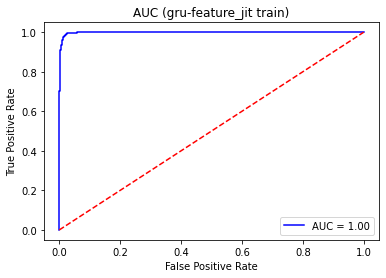

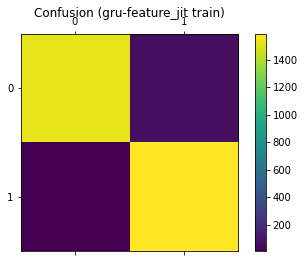

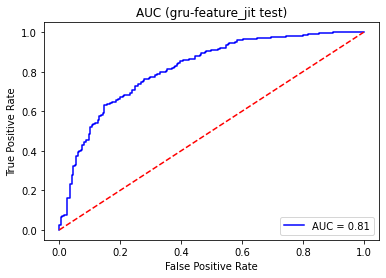

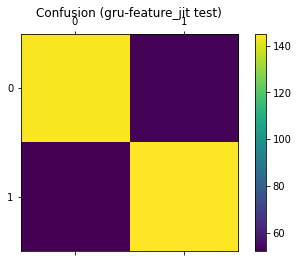

In [ ]:
import tensorflow as tf
from keras.layers import Dense, LSTM, GRU, Activation, Conv1D, Flatten, Input  # Dropout, BatchNormalization
class GRUFeatureModel(tf.keras.Model):
    def __init__(self):
        super(GRUFeatureModel, self).__init__()
        self.gru1 = GRU(512, input_shape=(750, 32), return_sequences=True)
        self.activation = Activation("relu")
        self.gru2 = GRU(256)
        self.dense1 = Dense(128, activation='relu')
        self.dense2 = Dense(128, activation='relu')
        self.dense3 = Dense(64, activation='relu')
        self.dense4 = Dense(1, activation='sigmoid')

    def call(self, inputs):
        [x, w] = inputs
        out1 = self.gru1(w)
        out1 = self.activation(out1)
        out1 = self.gru2(out1)
        out1 = self.dense1(out1)
        out2 = self.dense2(x)
        out = tf.keras.layers.Add()([out1, out2])
        out = self.dense3(out)
        return self.dense4(out)

def mk_gru_feature_model():
    return bdeep.SequentialModel(GRUFeatureModel, {}, FEAT_CONFIG, SEQ_CONFIG)

SEQ_CONFIG = bdeep.SequentialConfig(num_epochs=50, batch_size=256, verbose=True)
FEAT_CONFIG = bm.FeatureConfig(strategy=bm.Strategy.MULTI, use_pca=True, use_eeg=True)

MODELS = []


# NOTE: When ready to test with holdouts, change list to bp.STANDARD_PREP_NAMES
for prep_name in ['jit']:
    MODELS.extend([
        bm.ModelCase('gru-feature', prep_name, mk_gru_feature_model),
    ])

# Test training with some deep learning models
def test_models(models: Optional[List[bm.ModelCase]] = None):
    if models is None:
        models = bdeep.MODELS
    bp.ensure_all()
    for case in models:
        print(f'Training model {case.model_name} {case.prep_name}')
        rand = RandomState(42)
        model = case.model_fn()
        model.execute(case.model_name, case.prep_name, rand)

test_models(MODELS)        

Training model gru-feature jit
Epoch 1/50
50/50 [==============================] - 12s 177ms/step - loss: 0.7239 - accuracy: 0.5216
Epoch 2/50
50/50 [==============================] - 9s 179ms/step - loss: 0.6468 - accuracy: 0.6176
Epoch 3/50
50/50 [==============================] - 9s 185ms/step - loss: 0.6166 - accuracy: 0.6572
Epoch 4/50
50/50 [==============================] - 9s 182ms/step - loss: 0.5888 - accuracy: 0.6976
Epoch 5/50
50/50 [==============================] - 10s 196ms/step - loss: 0.5516 - accuracy: 0.7346
Epoch 6/50
50/50 [==============================] - 10s 190ms/step - loss: 0.5328 - accuracy: 0.7359
Epoch 7/50
50/50 [==============================] - 10s 204ms/step - loss: 0.5025 - accuracy: 0.7591
Epoch 8/50
50/50 [==============================] - 9s 187ms/step - loss: 0.4650 - accuracy: 0.7945
Epoch 9/50
50/50 [==============================] - 10s 192ms/step - loss: 0.4382 - accuracy: 0.8027
Epoch 10/50
50/50 [==============================] - 9s 190ms/st

gru-feature_jit train size: 3188
gru-feature_jit train tn: 1586
gru-feature_jit train fp: 8
gru-feature_jit train fn: 2
gru-feature_jit train tp: 1592
gru-feature_jit train accuracy: 0.9968632371392723
gru-feature_jit train precision: 0.995
gru-feature_jit train recall: 0.998745294855709
gru-feature_jit train f1: 0.9968691296180339
13/13 [==============================] - 1s 55ms/step
gru-feature_jit test size: 394
gru-feature_jit test tn: 148
gru-feature_jit test fp: 49
gru-feature_jit test fn: 64
gru-feature_jit test tp: 133
gru-feature_jit test accuracy: 0.7131979695431472
gru-feature_jit test precision: 0.7307692307692307
gru-feature_jit test recall: 0.6751269035532995
gru-feature_jit test f1: 0.7018469656992085


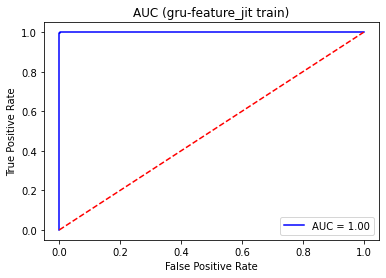

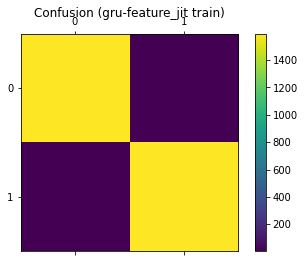

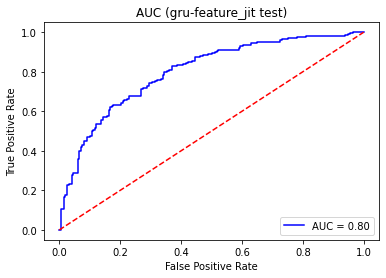

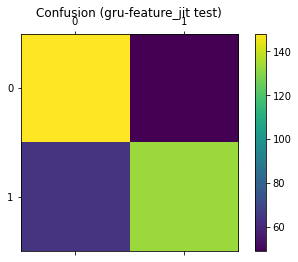

In [ ]:
import tensorflow as tf
from keras.layers import Dense, LSTM, GRU, Activation, Conv1D, Flatten, Input  # Dropout, BatchNormalization
class GRUFeatureModel(tf.keras.Model):
    def __init__(self):
        super(GRUFeatureModel, self).__init__()
        self.gru1 = GRU(512, input_shape=(750, 32), return_sequences=True)
        self.activation = Activation("relu")
        self.gru2 = GRU(256)
        self.dense1 = Dense(128, activation='relu')
        self.dense2 = Dense(128, activation='relu')
        self.dense3 = Dense(64, activation='relu')
        self.dense4 = Dense(1, activation='sigmoid')

    def call(self, inputs):
        [x, w] = inputs
        out1 = self.gru1(w)
        out1 = self.activation(out1)
        out1 = self.gru2(out1)
        out1 = self.dense1(out1)
        out2 = self.dense2(x)
        out = tf.keras.layers.Add()([out1, out2])
        out = self.dense3(out)
        return self.dense4(out)

def mk_gru_feature_model():
    return bdeep.SequentialModel(GRUFeatureModel, {}, FEAT_CONFIG, SEQ_CONFIG)

SEQ_CONFIG = bdeep.SequentialConfig(num_epochs=50, batch_size=64, verbose=True)
FEAT_CONFIG = bm.FeatureConfig(strategy=bm.Strategy.MULTI, use_pca=True, use_eeg=True)

MODELS = []


# NOTE: When ready to test with holdouts, change list to bp.STANDARD_PREP_NAMES
for prep_name in ['jit']:
    MODELS.extend([
        bm.ModelCase('gru-feature', prep_name, mk_gru_feature_model),
    ])

# Test training with some deep learning models
def test_models(models: Optional[List[bm.ModelCase]] = None):
    if models is None:
        models = bdeep.MODELS
    bp.ensure_all()
    for case in models:
        print(f'Training model {case.model_name} {case.prep_name}')
        rand = RandomState(42)
        model = case.model_fn()
        model.execute(case.model_name, case.prep_name, rand)

test_models(MODELS)        

Training model lstm-feature jit
Epoch 1/50
13/13 [==============================] - 12s 723ms/step - loss: 0.7247 - accuracy: 0.5207
Epoch 2/50
13/13 [==============================] - 10s 736ms/step - loss: 0.6678 - accuracy: 0.5928
Epoch 3/50
13/13 [==============================] - 10s 737ms/step - loss: 0.6479 - accuracy: 0.6230
Epoch 4/50
13/13 [==============================] - 10s 734ms/step - loss: 0.6299 - accuracy: 0.6524
Epoch 5/50
13/13 [==============================] - 10s 729ms/step - loss: 0.6186 - accuracy: 0.6672
Epoch 6/50
13/13 [==============================] - 9s 721ms/step - loss: 0.6048 - accuracy: 0.6860
Epoch 7/50
13/13 [==============================] - 9s 720ms/step - loss: 0.5903 - accuracy: 0.6942
Epoch 8/50
13/13 [==============================] - 9s 725ms/step - loss: 0.5906 - accuracy: 0.6848
Epoch 9/50
13/13 [==============================] - 9s 719ms/step - loss: 0.5799 - accuracy: 0.6995
Epoch 10/50
13/13 [==============================] - 10s 731ms/

lstm-feature_jit train size: 3188
lstm-feature_jit train tn: 1490
lstm-feature_jit train fp: 104
lstm-feature_jit train fn: 14
lstm-feature_jit train tp: 1580
lstm-feature_jit train accuracy: 0.9629861982434128
lstm-feature_jit train precision: 0.9382422802850356
lstm-feature_jit train recall: 0.9912170639899623
lstm-feature_jit train f1: 0.9640024405125077
13/13 [==============================] - 1s 60ms/step
lstm-feature_jit test size: 394
lstm-feature_jit test tn: 146
lstm-feature_jit test fp: 51
lstm-feature_jit test fn: 60
lstm-feature_jit test tp: 137
lstm-feature_jit test accuracy: 0.7182741116751269
lstm-feature_jit test precision: 0.7287234042553191
lstm-feature_jit test recall: 0.6954314720812182
lstm-feature_jit test f1: 0.7116883116883117


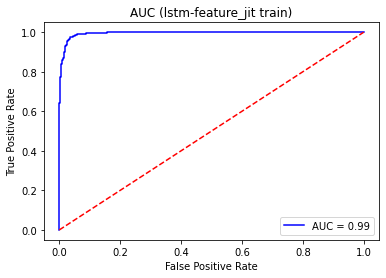

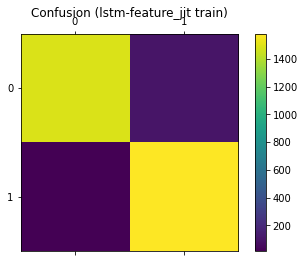

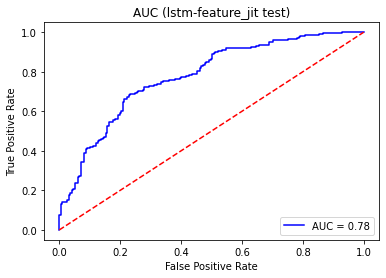

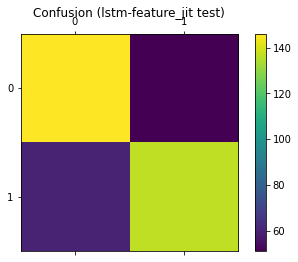

In [ ]:
import tensorflow as tf
from keras.layers import Dense, LSTM, GRU, Activation, Conv1D, Flatten, Input  # Dropout, BatchNormalization
class LSTMFeatureModel(tf.keras.Model):
    def __init__(self):
        super(LSTMFeatureModel, self).__init__()
        self.lstm1 = LSTM(512, input_shape=(750, 32), return_sequences=True)
        self.activation = Activation("relu")
        self.lstm2 = LSTM(256)
        self.dense1 = Dense(128, activation='relu')
        self.dense2 = Dense(128, activation='relu')
        self.dense3 = Dense(64, activation='relu')
        self.dense4 = Dense(1, activation='sigmoid')

    def call(self, inputs):
        [x, w] = inputs
        out1 = self.lstm1(w)
        out1 = self.activation(out1)
        out1 = self.lstm2(out1)
        out1 = self.dense1(out1)
        out2 = self.dense2(x)
        out = tf.keras.layers.Add()([out1, out2])
        out = self.dense3(out)
        return self.dense4(out)

def mk_lstm_feature_model():
    return bdeep.SequentialModel(LSTMFeatureModel, {}, FEAT_CONFIG, SEQ_CONFIG)

SEQ_CONFIG = bdeep.SequentialConfig(num_epochs=50, batch_size=256, verbose=True)
FEAT_CONFIG = bm.FeatureConfig(strategy=bm.Strategy.MULTI, use_pca=True, use_eeg=True)

MODELS = []


# NOTE: When ready to test with holdouts, change list to bp.STANDARD_PREP_NAMES
for prep_name in ['jit']:
    MODELS.extend([
        bm.ModelCase('lstm-feature', prep_name, mk_lstm_feature_model),
    ])

# Test training with some deep learning models
def test_models(models: Optional[List[bm.ModelCase]] = None):
    if models is None:
        models = bdeep.MODELS
    bp.ensure_all()
    for case in models:
        print(f'Training model {case.model_name} {case.prep_name}')
        rand = RandomState(42)
        model = case.model_fn()
        model.execute(case.model_name, case.prep_name, rand)

test_models(MODELS)        

Training model gru-feature jit
Epoch 1/40
25/25 [==============================] - 11s 307ms/step - loss: 0.7285 - accuracy: 0.5144
Epoch 2/40
25/25 [==============================] - 8s 316ms/step - loss: 0.6578 - accuracy: 0.5935
Epoch 3/40
25/25 [==============================] - 8s 317ms/step - loss: 0.6292 - accuracy: 0.6462
Epoch 4/40
25/25 [==============================] - 8s 317ms/step - loss: 0.6091 - accuracy: 0.6694
Epoch 5/40
25/25 [==============================] - 8s 315ms/step - loss: 0.5903 - accuracy: 0.6829
Epoch 6/40
25/25 [==============================] - 8s 316ms/step - loss: 0.5704 - accuracy: 0.7061
Epoch 7/40
25/25 [==============================] - 8s 317ms/step - loss: 0.5596 - accuracy: 0.7136
Epoch 8/40
25/25 [==============================] - 8s 315ms/step - loss: 0.5487 - accuracy: 0.7299
Epoch 9/40
25/25 [==============================] - 8s 317ms/step - loss: 0.5394 - accuracy: 0.7371
Epoch 10/40
25/25 [==============================] - 8s 318ms/step -

gru-feature_jit train size: 3188
gru-feature_jit train tn: 1571
gru-feature_jit train fp: 23
gru-feature_jit train fn: 203
gru-feature_jit train tp: 1391
gru-feature_jit train accuracy: 0.9291091593475533
gru-feature_jit train precision: 0.9837340876944838
gru-feature_jit train recall: 0.8726474278544541
gru-feature_jit train f1: 0.9248670212765957
13/13 [==============================] - 1s 54ms/step
gru-feature_jit test size: 394
gru-feature_jit test tn: 162
gru-feature_jit test fp: 35
gru-feature_jit test fn: 95
gru-feature_jit test tp: 102
gru-feature_jit test accuracy: 0.6700507614213198
gru-feature_jit test precision: 0.7445255474452555
gru-feature_jit test recall: 0.5177664974619289
gru-feature_jit test f1: 0.6107784431137725


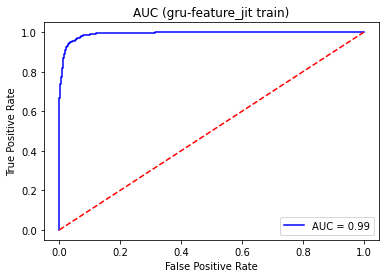

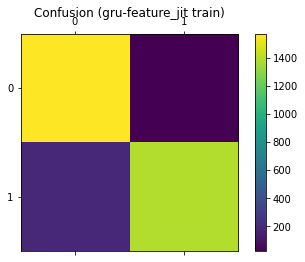

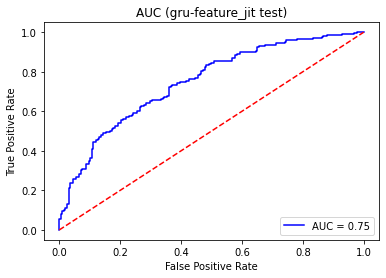

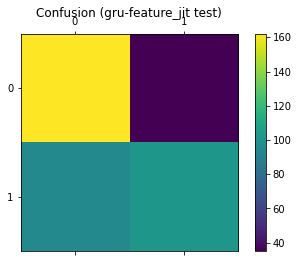

In [ ]:
import tensorflow as tf
from keras.layers import Dense, LSTM, GRU, Activation, Conv1D, Flatten, Input  # Dropout, BatchNormalization
class GRUFeatureModel(tf.keras.Model):
    def __init__(self):
        super(GRUFeatureModel, self).__init__()
        self.gru1 = GRU(512, input_shape=(750, 32), return_sequences=True)
        self.activation = Activation("relu")
        self.gru2 = GRU(256)
        self.dense1 = Dense(128, activation='gelu')
        self.dense2 = Dense(128, activation='relu')
        self.dense3 = Dense(1, activation='sigmoid')

    def call(self, inputs):
        [x, w] = inputs
        out1 = self.gru1(w)
        out1 = self.activation(out1)
        out1 = self.gru2(out1)
        out1 = self.dense1(out1)
        out2 = self.dense2(x)
        out = tf.keras.layers.Add()([out1, out2])
        return self.dense3(out)

def mk_gru_feature_model():
    return bdeep.SequentialModel(GRUFeatureModel, {}, bdeep.FEAT_CONFIG, SEQ_CONFIG)

SEQ_CONFIG = bdeep.SequentialConfig(num_epochs=40, batch_size=128, verbose=True)

MODELS = []


# NOTE: When ready to test with holdouts, change list to bp.STANDARD_PREP_NAMES
for prep_name in ['jit']:
    MODELS.extend([
        bm.ModelCase('gru-feature', prep_name, mk_gru_feature_model),
    ])

# Test training with some deep learning models
def test_models(models: Optional[List[bm.ModelCase]] = None):
    if models is None:
        models = bdeep.MODELS
    bp.ensure_all()
    for case in models:
        print(f'Training model {case.model_name} {case.prep_name}')
        rand = RandomState(42)
        model = case.model_fn()
        model.execute(case.model_name, case.prep_name, rand)

test_models(MODELS)        

Training model gru-feature jit
Epoch 1/30
13/13 [==============================] - 10s 543ms/step - loss: 0.7389 - accuracy: 0.5088
Epoch 2/30
13/13 [==============================] - 7s 559ms/step - loss: 0.6695 - accuracy: 0.5831
Epoch 3/30
13/13 [==============================] - 7s 556ms/step - loss: 0.6507 - accuracy: 0.6186
Epoch 4/30
13/13 [==============================] - 7s 562ms/step - loss: 0.6216 - accuracy: 0.6619
Epoch 5/30
13/13 [==============================] - 7s 564ms/step - loss: 0.6018 - accuracy: 0.6785
Epoch 6/30
13/13 [==============================] - 7s 565ms/step - loss: 0.5902 - accuracy: 0.6982
Epoch 7/30
13/13 [==============================] - 7s 555ms/step - loss: 0.5814 - accuracy: 0.7133
Epoch 8/30
13/13 [==============================] - 7s 557ms/step - loss: 0.5677 - accuracy: 0.7061
Epoch 9/30
13/13 [==============================] - 7s 563ms/step - loss: 0.5500 - accuracy: 0.7271
Epoch 10/30
13/13 [==============================] - 7s 558ms/step -

gru-feature_jit train size: 3188
gru-feature_jit train tn: 1157
gru-feature_jit train fp: 437
gru-feature_jit train fn: 90
gru-feature_jit train tp: 1504
gru-feature_jit train accuracy: 0.8346925972396487
gru-feature_jit train precision: 0.7748583204533745
gru-feature_jit train recall: 0.9435382685069009
gru-feature_jit train f1: 0.8509193776520508
13/13 [==============================] - 1s 55ms/step
gru-feature_jit test size: 394
gru-feature_jit test tn: 119
gru-feature_jit test fp: 78
gru-feature_jit test fn: 51
gru-feature_jit test tp: 146
gru-feature_jit test accuracy: 0.6725888324873096
gru-feature_jit test precision: 0.6517857142857143
gru-feature_jit test recall: 0.7411167512690355
gru-feature_jit test f1: 0.6935866983372923


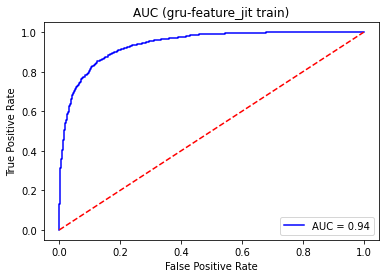

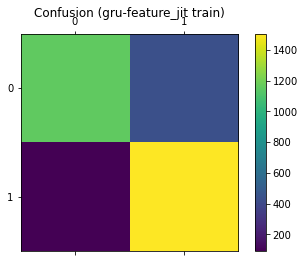

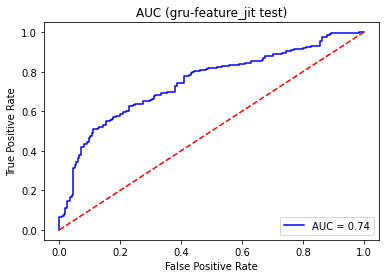

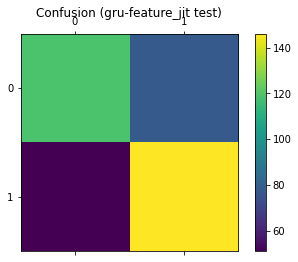

In [ ]:
import tensorflow as tf
from keras.layers import Dense, LSTM, GRU, Activation, Conv1D, Flatten, Input  # Dropout, BatchNormalization
class GRUFeatureModel(tf.keras.Model):
    def __init__(self):
        super(GRUFeatureModel, self).__init__()
        self.gru1 = GRU(512, input_shape=(750, 32), return_sequences=True)
        self.activation = Activation("relu")
        self.gru2 = GRU(256)
        self.dense1 = Dense(128, activation='gelu')
        self.dense2 = Dense(128, activation='gelu')
        self.dense3 = Dense(1, activation='sigmoid')

    def call(self, inputs):
        [x, w] = inputs
        out1 = self.gru1(w)
        out1 = self.activation(out1)
        out1 = self.gru2(out1)
        out1 = self.dense1(out1)
        out2 = self.dense2(x)
        out = tf.keras.layers.Add()([out1, out2])
        return self.dense3(out)

def mk_gru_feature_model():
    return bdeep.SequentialModel(GRUFeatureModel, {}, bdeep.FEAT_CONFIG, SEQ_CONFIG)

SEQ_CONFIG = bdeep.SequentialConfig(num_epochs=30, batch_size=256, verbose=True)

MODELS = []


# NOTE: When ready to test with holdouts, change list to bp.STANDARD_PREP_NAMES
for prep_name in ['jit']:
    MODELS.extend([
        bm.ModelCase('gru-feature', prep_name, mk_gru_feature_model),
    ])

# Test training with some deep learning models
def test_models(models: Optional[List[bm.ModelCase]] = None):
    if models is None:
        models = bdeep.MODELS
    bp.ensure_all()
    for case in models:
        print(f'Training model {case.model_name} {case.prep_name}')
        rand = RandomState(42)
        model = case.model_fn()
        model.execute(case.model_name, case.prep_name, rand)

test_models(MODELS)        

Training model lstm-feature jit
Epoch 1/50
25/25 [==============================] - 13s 389ms/step - loss: 0.7323 - accuracy: 0.5176
Epoch 2/50
25/25 [==============================] - 10s 396ms/step - loss: 0.6747 - accuracy: 0.5838
Epoch 3/50
25/25 [==============================] - 10s 400ms/step - loss: 0.6489 - accuracy: 0.6167
Epoch 4/50
25/25 [==============================] - 10s 401ms/step - loss: 0.6294 - accuracy: 0.6386
Epoch 5/50
25/25 [==============================] - 10s 398ms/step - loss: 0.6207 - accuracy: 0.6644
Epoch 6/50
25/25 [==============================] - 10s 397ms/step - loss: 0.6057 - accuracy: 0.6653
Epoch 7/50
25/25 [==============================] - 10s 396ms/step - loss: 0.5985 - accuracy: 0.6775
Epoch 8/50
25/25 [==============================] - 10s 395ms/step - loss: 0.5871 - accuracy: 0.6832
Epoch 9/50
25/25 [==============================] - 10s 396ms/step - loss: 0.5763 - accuracy: 0.7058
Epoch 10/50
25/25 [==============================] - 10s 39

lstm-feature_jit train size: 3188
lstm-feature_jit train tn: 1381
lstm-feature_jit train fp: 213
lstm-feature_jit train fn: 256
lstm-feature_jit train tp: 1338
lstm-feature_jit train accuracy: 0.8528858218318696
lstm-feature_jit train precision: 0.8626692456479691
lstm-feature_jit train recall: 0.8393977415307403
lstm-feature_jit train f1: 0.8508744038155804
13/13 [==============================] - 1s 59ms/step
lstm-feature_jit test size: 394
lstm-feature_jit test tn: 140
lstm-feature_jit test fp: 57
lstm-feature_jit test fn: 84
lstm-feature_jit test tp: 113
lstm-feature_jit test accuracy: 0.6421319796954315
lstm-feature_jit test precision: 0.6647058823529411
lstm-feature_jit test recall: 0.5736040609137056
lstm-feature_jit test f1: 0.6158038147138966


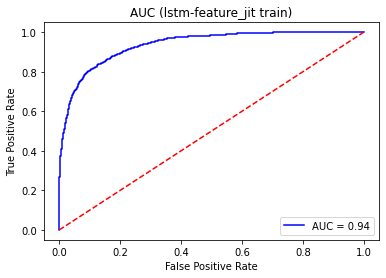

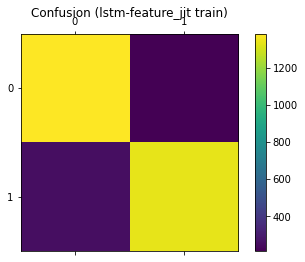

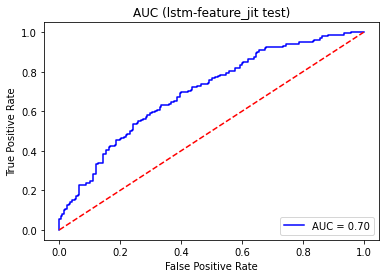

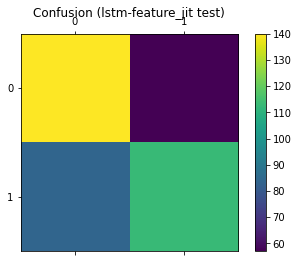

In [ ]:
import biosignals.models as bm
from typing import Optional, List
from numpy.random import RandomState

def mk_lstm_feature_model():
    return bdeep.SequentialModel(bdeep.LSTMFeatureModel, {}, bdeep.FEAT_CONFIG, SEQ_CONFIG)
    
SEQ_CONFIG = bdeep.SequentialConfig(num_epochs=50, batch_size=128, verbose=True)

MODELS = []


# NOTE: When ready to test with holdouts, change list to bp.STANDARD_PREP_NAMES
for prep_name in ['jit']:
    MODELS.extend([
        bm.ModelCase('lstm-feature', prep_name, mk_lstm_feature_model),
    ])

# Test training with some deep learning models
def test_models(models: Optional[List[bm.ModelCase]] = None):
    if models is None:
        models = bdeep.MODELS
    bp.ensure_all()
    for case in models:
        print(f'Training model {case.model_name} {case.prep_name}')
        rand = RandomState(42)
        model = case.model_fn()
        model.execute(case.model_name, case.prep_name, rand)

test_models(MODELS)

Training model gru-feature jit
Epoch 1/50
13/13 [==============================] - 15s 535ms/step - loss: 0.8412 - accuracy: 0.5009
Epoch 2/50
13/13 [==============================] - 7s 552ms/step - loss: 0.7093 - accuracy: 0.5367
Epoch 3/50
13/13 [==============================] - 7s 554ms/step - loss: 0.6911 - accuracy: 0.5565
Epoch 4/50
13/13 [==============================] - 8s 578ms/step - loss: 0.6658 - accuracy: 0.5812
Epoch 5/50
13/13 [==============================] - 7s 569ms/step - loss: 0.6639 - accuracy: 0.5910
Epoch 6/50
13/13 [==============================] - 7s 568ms/step - loss: 0.6561 - accuracy: 0.6088
Epoch 7/50
13/13 [==============================] - 7s 573ms/step - loss: 0.6801 - accuracy: 0.6292
Epoch 8/50
13/13 [==============================] - 8s 582ms/step - loss: 0.7217 - accuracy: 0.5364
Epoch 9/50
13/13 [==============================] - 8s 581ms/step - loss: 0.6785 - accuracy: 0.5536
Epoch 10/50
13/13 [==============================] - 8s 576ms/step -

gru-feature_jit train size: 3188
gru-feature_jit train tn: 1402
gru-feature_jit train fp: 192
gru-feature_jit train fn: 392
gru-feature_jit train tp: 1202
gru-feature_jit train accuracy: 0.8168130489335006
gru-feature_jit train precision: 0.8622668579626973
gru-feature_jit train recall: 0.7540777917189461
gru-feature_jit train f1: 0.8045515394912985
13/13 [==============================] - 1s 56ms/step
gru-feature_jit test size: 394
gru-feature_jit test tn: 145
gru-feature_jit test fp: 52
gru-feature_jit test fn: 97
gru-feature_jit test tp: 100
gru-feature_jit test accuracy: 0.6218274111675127
gru-feature_jit test precision: 0.6578947368421053
gru-feature_jit test recall: 0.5076142131979695
gru-feature_jit test f1: 0.5730659025787966


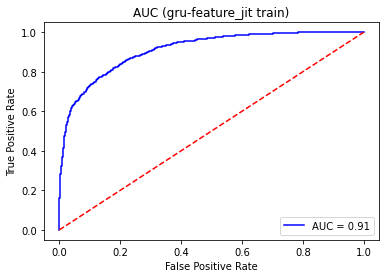

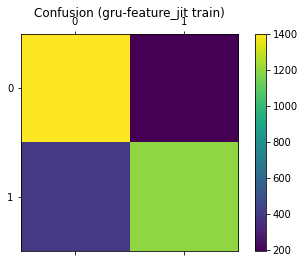

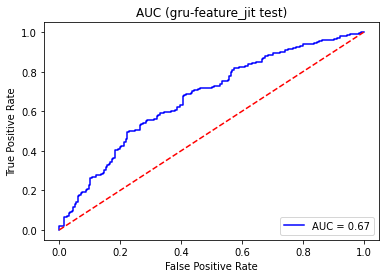

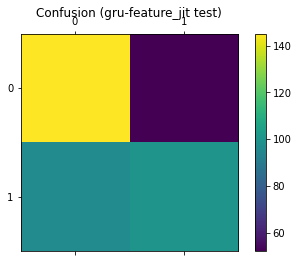

In [8]:
import biosignals.models as bm
from typing import Optional, List
from numpy.random import RandomState

import tensorflow as tf
from keras.layers import Dense, LSTM, GRU, Activation, Conv1D, Flatten, Input, Dropout #, BatchNormalization
class GRUFeatureModel(tf.keras.Model):
    def __init__(self):
        super(GRUFeatureModel, self).__init__()
        self.gru1 = GRU(512, input_shape=(750, 32), return_sequences=True)
        self.activation = Activation("relu")
        self.gru2 = GRU(256)
        self.dense1 = Dense(128, activation='relu')
        self.dense2 = Dense(128, activation='relu')
        self.dropout = Dropout(0.5)
        self.dense3 = Dense(64, activation='relu')
        self.dense4 = Dense(1, activation='sigmoid')

    def call(self, inputs):
        [x, w] = inputs
        out1 = self.gru1(w)
        out1 = self.activation(out1)
        out1 = self.gru2(out1)
        out1 = self.dense1(out1)
        out2 = self.dense2(x)
        out = tf.keras.layers.Add()([out1, out2])
        out = self.dense3(out)
        out = self.dropout(out)
        return self.dense4(out)

def mk_gru_feature_model():
    return bdeep.SequentialModel(GRUFeatureModel, {}, FEAT_CONFIG, SEQ_CONFIG)

SEQ_CONFIG = bdeep.SequentialConfig(num_epochs=50, batch_size=256, verbose=True)
FEAT_CONFIG = bm.FeatureConfig(strategy=bm.Strategy.MULTI, use_pca=True, use_eeg=True)

MODELS = []


# NOTE: When ready to test with holdouts, change list to bp.STANDARD_PREP_NAMES
for prep_name in ['jit']:
    MODELS.extend([
        bm.ModelCase('gru-feature', prep_name, mk_gru_feature_model),
    ])

# Test training with some deep learning models
def test_models(models: Optional[List[bm.ModelCase]] = None):
    if models is None:
        models = bdeep.MODELS
    bp.ensure_all()
    for case in models:
        print(f'Training model {case.model_name} {case.prep_name}')
        rand = RandomState(42)
        model = case.model_fn()
        model.execute(case.model_name, case.prep_name, rand)

test_models(MODELS)        